<a href="https://colab.research.google.com/github/milenaauzier/Mixtape-Causal-Inference-/blob/main/Introdu%C3%A7%C3%A3o_%C3%A0_Causalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução à causalidade - Inferêncial causal The Brave and True**

Usando o exemplo do estudo, teremos o seguinte problema:

"Se alguém lhe disser que as escolas que dão tablets a seus alunos têm melhor desempenho do que aquelas que não o fazem, você pode apontar rapidamente que provavelmente é o caso de que as escolas com tablets são mais ricas. Como tal, eles se sairiam melhor do que a média, mesmo sem os tablets. Por causa disso, não podemos concluir que dar tablets ás crianças durantes as aulas causará um aumento em seu desempenho acadêmico." 

In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt 
from matplotlib import style

In [2]:
style.use("fivethirtyeight")

In [3]:
np.random.seed(123) # é usado para inicializar o gerado de números aleatórios do Numpy, o (123) determina que todos os comando aleatorios use sempre os mesmos resultados 
n = 100
tuition = np.random.normal(1000, 300, n).round() # gera uma distribuição normal (Gaussiana)
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))


In [4]:
data

,enem_score,Tuition,Tablet
0,227.622953,674.0,False
1,219.079925,1299.0,True
2,400.889622,1085.0,False
3,122.761509,548.0,False
4,315.064276,826.0,False
...,...,...,...
95,451.019929,1309.0,True
96,113.288467,675.0,True
97,116.042782,591.0,False
98,266.238616,1114.0,True


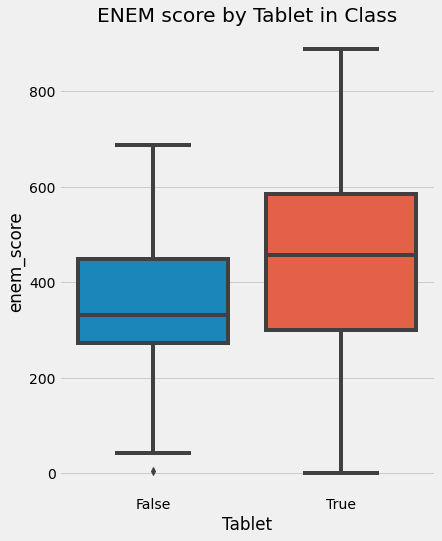

In [5]:
plt.figure(figsize=(6,8))
sns.boxplot(y="enem_score", x="Tablet", data=data).set_title('ENEM score by Tablet in Class')
plt.show()

In [6]:
pd.DataFrame(dict(
    i = [1,2,3,4],
    y0 = [500,600,800,700],
    y1 = [450,600,600,750],
    t = [0,0,1,1],
    y = [500,600,600,750],
    te = [-50,0,-200,50]
))

,i,y0,y1,t,y,te
0,1,500,450,0,500,-50
1,2,600,600,0,600,0
2,3,800,600,1,600,-200
3,4,700,750,1,750,50


# Bias (ou viés)



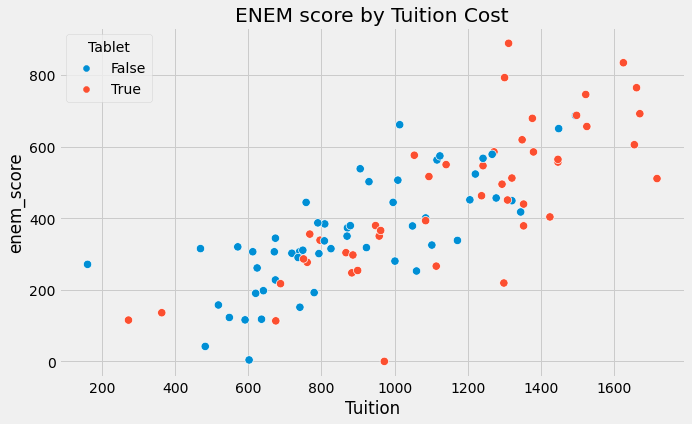

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Tuition", y="enem_score", hue="Tablet", data=data, s=70).set_title('ENEM score by Tuition Cost')
plt.show()